In [5]:
import pandas as pd
import matplotlib.pyplot as plt

snp500url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

#scraping wikipedia to fetch S&P 500 stock list
data_table = pd.read_html(snp500url)
#print(data_table)

In [7]:
tickers = data_table[0][1:][0].tolist()
print(tickers)

print("\nTotal number of companies are:")
len(tickers)

['MMM', 'ABT', 'ABBV', 'ACN', 'ATVI', 'AYI', 'ADBE', 'AMD', 'AAP', 'AES', 'AET', 'AMG', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'AGN', 'ADS', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'APC', 'ADI', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ARNC', 'AJG', 'AIZ', 'T', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BHGE', 'BLL', 'BAC', 'BK', 'BAX', 'BBT', 'BDX', 'BRK.B', 'BBY', 'BIIB', 'BLK', 'HRB', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BHF', 'BMY', 'AVGO', 'BF.B', 'CHRW', 'CA', 'COG', 'CDNS', 'CPB', 'COF', 'CAH', 'CBOE', 'KMX', 'CCL', 'CAT', 'CBG', 'CBS', 'CELG', 'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CHK', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'COO', 'GLW', 'COST', 'COTY', 'CCI', 'CSRA', 'CSX'

505

In [11]:
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
import numpy as np
from scipy.cluster.vq import kmeans,vq
import pandas_datareader as dr
from math import sqrt
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

#setting the plt size
plt.rcParams['figure.figsize'] = 9,8

#fetching tickers(500) closing prices from google finance, using DataReader package for this purpose
price_list = []
for ticker in tickers:
    try:
        prices = dr.DataReader(ticker,'google','01/01/2018')['Close']
        #print(prices)
        prices = pd.DataFrame(prices)
        prices.columns = [ticker]
        price_list.append(prices)
    except:
        pass
    prices_df = pd.concat(price_list,axis=1)
prices_df.sort_index(inplace=True)

F:\Anaconda\lib\site-packages\pandas_datareader\google\daily.py:40: UnstableAPIWarning: 
The Google Finance API has not been stable since late 2017. Requests seem
to fail at random. Failure is especially common when bulk downloading.

  warnings.warn(UNSTABLE_WARNING, UnstableAPIWarning)


In [9]:
prices_df.head() 

,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AMD,AAP,AES,...,WYNN,XEL,XRX,XLNX,XL,XYL,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,235.64,58.79,98.41,153.84,64.31,179.81,177.70,10.98,106.09,10.88,...,164.30,47.81,29.37,67.88,34.02,68.07,81.60,124.06,50.70,71.77
2018-01-03,235.63,58.92,99.95,154.55,65.31,177.64,181.04,11.55,107.05,10.87,...,162.52,47.49,29.33,69.24,34.43,68.90,81.53,124.92,50.64,72.10
2018-01-04,238.71,58.82,99.38,156.38,64.66,180.60,183.22,12.12,111.00,10.83,...,163.40,47.12,29.69,70.49,35.24,69.36,82.36,124.74,50.85,72.53
2018-01-05,240.57,58.99,101.11,157.67,66.37,185.36,185.34,11.88,112.18,10.87,...,164.49,46.79,29.91,74.15,34.65,69.23,82.84,125.98,50.87,73.36
2018-01-08,239.79,58.82,99.49,158.93,66.63,185.73,185.04,12.28,111.39,10.87,...,162.30,47.14,30.26,74.64,34.46,69.48,82.98,126.22,50.62,74.24


In [13]:
#Calculate average annual percentage return and volatilities over a theoretical one year period
returns = prices_df.pct_change().mean() * 252
returns = pd.DataFrame(returns)
#print(returns)
returns.columns = ['Returns']
returns['Volatility'] = prices_df.pct_change().std() * sqrt(252)
#print(returns['Volatility'])
#format the data as a numpy array to feed into the K-Means algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T
#removing NaN values, replacing them by 0
cleaned_data = np.where(np.isnan(data), 0, data)
#cleaned_data

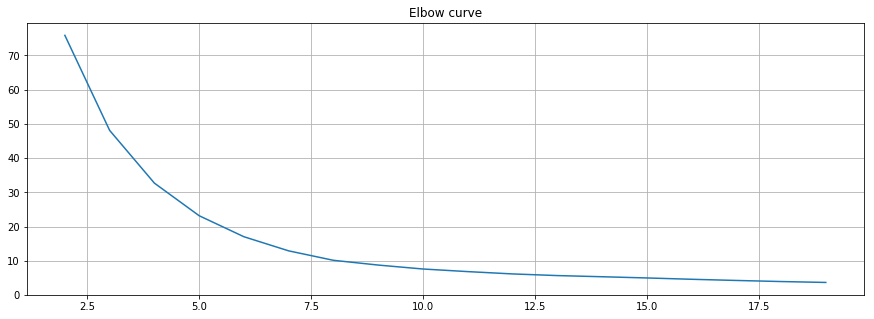

In [14]:
from sklearn.cluster import KMeans
X = cleaned_data
#within cluster sum of squares.we calculate the sum of squares of the distance of each data point 
# in cluster k from their center point ki.
wcss = []
for k in range(2, 20):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    wcss.append(k_means.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), wcss)
plt.grid(True)
plt.title('Elbow curve')
plt.show()

In [21]:
#the change in slope of curve is not significant after k=5. Hence we select no. of clusters to be 5

# computing K-Means with K = 5 (5 clusters)
centroids,_ = kmeans(cleaned_data,5)
# assign each sample to a cluster
idx,_ = vq(cleaned_data,centroids)
 
data = cleaned_data

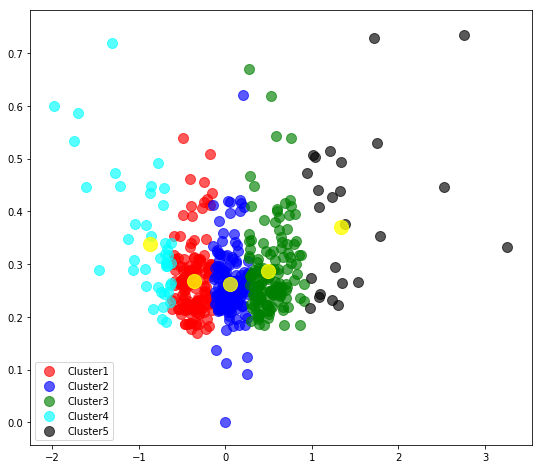

In [16]:
#using scatter plt 
plt.scatter(X[idx==0,0],X[idx==0,1],s=100,c='red',label='Cluster1',alpha=0.65)
plt.scatter(X[idx==1,0],X[idx==1,1],s=100,c='blue',label='Cluster2',alpha=0.65)
plt.scatter(X[idx==2,0],X[idx==2,1],s=100,c='green',label='Cluster3',alpha=0.65)
plt.scatter(X[idx==3,0],X[idx==3,1],s=100,c='cyan',label='Cluster4',alpha=0.65)
plt.scatter(X[idx==4,0],X[idx==4,1],s=100,c='black',label='Cluster5',alpha=0.65)
#plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s=300,c='yellow')
plt.scatter(centroids[:,0],centroids[:,1],s=200, c='yellow', alpha = 0.8)
plt.legend()
plt.show()

In [17]:
#Finally to get the details of which stock is actually in which cluster we can run the following line 
# of code to carry out a list comprehension to create a list of tuples in the (Stock Name, Cluster Number) format
details = [(name,cluster) for name, cluster in zip(returns.index,idx)]

In [18]:
labels =['Stock Symbol', 'Cluster']
df = pd.DataFrame.from_records(details, columns=labels)
df.head(n=10)

,Stock Symbol,Cluster
0,MMM,1
1,ABT,2
2,ABBV,4
3,ACN,1
4,ATVI,2
5,AYI,3
6,ADBE,4
7,AMD,2
8,AAP,2
9,AES,1


In [19]:
import os
import warnings
warnings.filterwarnings('ignore')
os.chdir('C:\\Users\\Sharif Niyaz\\Documents\\jupyter_notebook\\Machine-Learning-Python-master\\data')

In [20]:
#writing the stocks and cluster they belong to a csv file which can be used to build diverse portfolio.
df.to_csv('stock_portfolio.csv', header= True)